In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## Importing Data Sets

In [9]:
# Training data sets
train_beneficiarydata = pd.read_csv("./healthCareData/train_beneficiarydata.csv")
train_inpatientdata = pd.read_csv("./healthCareData/train_inpatientdata.csv")
train_outpatientdata = pd.read_csv("./healthCareData/train_outpatientdata.csv")
train_potentialfraud = pd.read_csv("./healthCareData/train_potentialfraud.csv")

#Testing data sets
test_beneficiarydata = pd.read_csv("./healthCareData/test_beneficiarydata.csv")
test_inpatientdata = pd.read_csv("./healthCareData/test_inpatientdata.csv")
test_outpatientdata = pd.read_csv("./healthCareData/test_outpatientdata.csv")
test_potentialfraud = pd.read_csv("./healthCareData/test_potentialfraud.csv")


In [11]:
train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))

In [12]:
patient = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)
patient.BeneID.unique().shape

(138556,)

In [13]:
full_data = pd.merge(patient, train_beneficiarydata, on='BeneID', how='left')

In [7]:
full_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'patientType', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depressio

## Question 2

### Study the relationship between the patient ages (at the time of their service) and the counts of medical claims.

In [17]:
# Calculating the age of the patient at the time of their service
full_data['ClaimStartDt'] =  pd.to_datetime(full_data['ClaimStartDt'], format='%Y/%m/%d')
full_data['DOB'] =  pd.to_datetime(full_data['DOB'], format='%Y/%m/%d')
full_data['AgeWhenServed'] = full_data['ClaimStartDt'] - full_data['DOB']


In [18]:
# Converting the unit of AgeWhenServed to year from days
full_data['AgeWhenServed'] = full_data['AgeWhenServed'] / np.timedelta64(1, 'Y')
full_data['AgeWhenServed']

0         66.279253
1         66.665298
2         66.711842
3         94.961567
4         71.369022
            ...    
558206    57.348200
558207    57.411172
558208    57.482358
558209    57.548067
558210    57.630205
Name: AgeWhenServed, Length: 558211, dtype: float64

In [19]:
# Converting AgeWhenServed to int from float
full_data['AgeWhenServed'] = full_data['AgeWhenServed'].fillna(-1)
full_data['AgeWhenServed'] = full_data['AgeWhenServed'].astype(int)
full_data['AgeWhenServed'] = full_data['AgeWhenServed'].replace(-1, np.nan)

full_data['AgeWhenServed']

0         66
1         66
2         66
3         94
4         71
          ..
558206    57
558207    57
558208    57
558209    57
558210    57
Name: AgeWhenServed, Length: 558211, dtype: int64

Text(0, 0.5, 'Number of Claims')

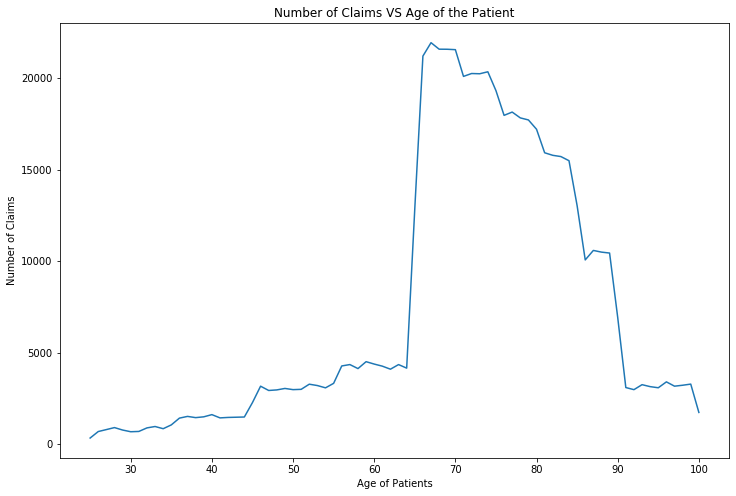

In [11]:
# Line graph of number of claims and age
ax1 = full_data.groupby('AgeWhenServed').agg({'ClaimID' : 'count'}).plot(figsize = (12, 8), title = 'Number of Claims VS Age of the Patient', legend = False)
ax1.set_xlabel("Age of Patients")
ax1.set_ylabel('Number of Claims')

In [21]:
# All the train data merged
full_data_fraud = pd.merge(full_data, train_potentialfraud, on='Provider', how='left')

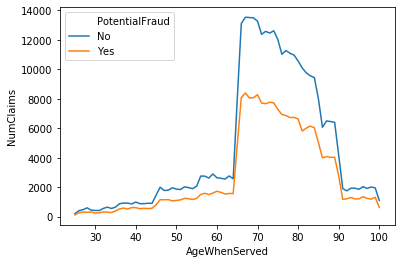

In [31]:
averageage = full_data_fraud.groupby(['PotentialFraud', 'AgeWhenServed'])['ClaimID'].count().reset_index(name = 'NumClaims')
averageage
sns.lineplot(data = averageage, x = 'AgeWhenServed', y = 'NumClaims', hue = 'PotentialFraud')


### Study the relationship between the patient age and their chronic conditions. Within the train-samples, do these chronic conditions show a definite trend with respect to increasing ages?

In [12]:
# Replacing 2 as 0 in ChronicCond columns and 'Y' in RenalDiseaseIndicator to 1
full_data = full_data.replace({'ChronicCond_Alzheimer' : 2, 
                               'ChronicCond_Heartfailure' : 2, 
                               'ChronicCond_KidneyDisease' : 2,
                               'ChronicCond_Cancer' : 2, 
                               'ChronicCond_ObstrPulmonary' : 2, 
                               'ChronicCond_Depression' : 2, 
                               'ChronicCond_Diabetes' : 2, 
                               'ChronicCond_IschemicHeart' : 2, 
                               'ChronicCond_Osteoporasis' : 2, 
                               'ChronicCond_rheumatoidarthritis' : 2, 
                               'ChronicCond_stroke' : 2}, 0)
full_data = full_data.replace({'RenalDiseaseIndicator' : 'Y'}, 1)
full_data['RenalDiseaseIndicator'] = full_data['RenalDiseaseIndicator'].astype(int)


Text(0, 0.5, 'Number of Claims')

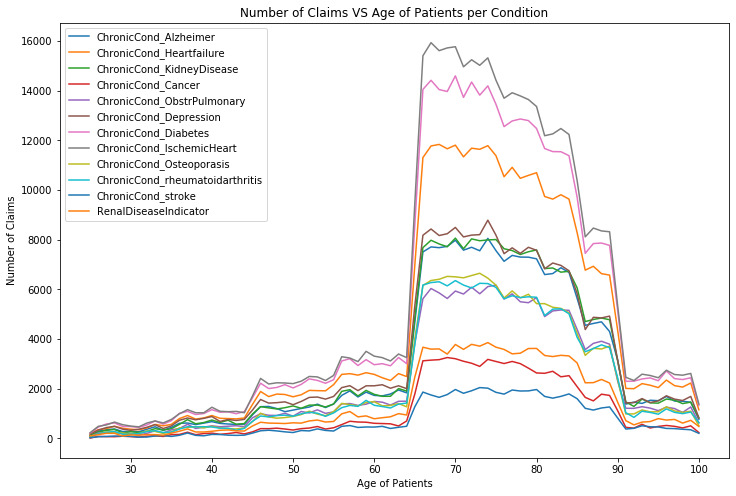

In [13]:
ax2 = full_data.groupby('AgeWhenServed').agg({'ChronicCond_Alzheimer' : 'sum',
                                        'ChronicCond_Heartfailure' : 'sum',
                                        'ChronicCond_KidneyDisease' : 'sum',
                                        'ChronicCond_Cancer' : 'sum',
                                        'ChronicCond_ObstrPulmonary' : 'sum',
                                        'ChronicCond_Depression' : 'sum',
                                        'ChronicCond_Diabetes' : 'sum',
                                        'ChronicCond_IschemicHeart' : 'sum',
                                        'ChronicCond_Osteoporasis' : 'sum',
                                        'ChronicCond_rheumatoidarthritis' : 'sum',
                                        'ChronicCond_stroke' : 'sum',
                                        'RenalDiseaseIndicator' : 'sum'}).plot(figsize = (12, 8), title = 'Number of Claims VS Age of Patients per Condition')
ax2.set_xlabel("Age of Patients")
ax2.set_ylabel('Number of Claims')

### In order to make sure the insurance premiums can cover the claims, the insurance company would need to categorize the patients according to their resource usage. In answering the question that what types of patients would make more outpatient visits, please provide your finding.

In [9]:
outpatient = full_data.loc[full_data.patientType == 'outpatient']


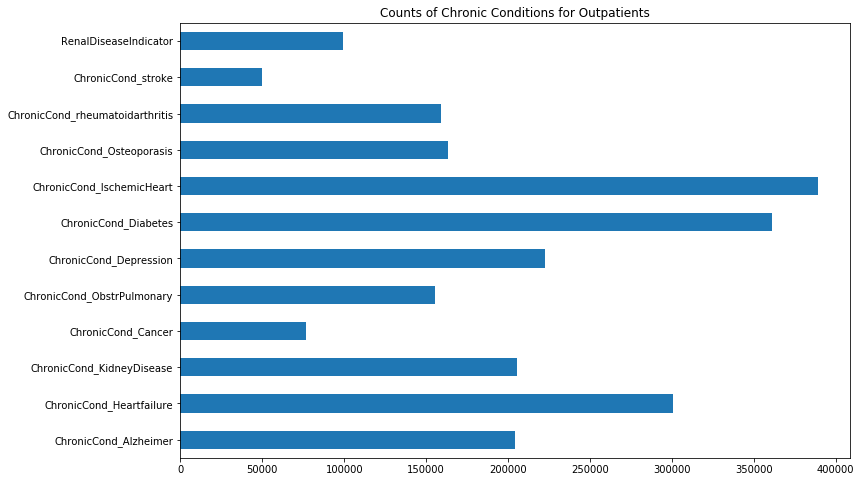

In [15]:
# Counting the cases of chronic conditions for outpatients
ax3 = outpatient.agg({'ChronicCond_Alzheimer' : 'sum',
                      'ChronicCond_Heartfailure' : 'sum',
                      'ChronicCond_KidneyDisease' : 'sum',
                      'ChronicCond_Cancer' : 'sum',
                      'ChronicCond_ObstrPulmonary' : 'sum',
                      'ChronicCond_Depression' : 'sum',
                      'ChronicCond_Diabetes' : 'sum',
                      'ChronicCond_IschemicHeart' : 'sum',
                      'ChronicCond_Osteoporasis' : 'sum',
                      'ChronicCond_rheumatoidarthritis' : 'sum',
                      'ChronicCond_stroke' : 'sum',
                      'RenalDiseaseIndicator' : 'sum'}).plot(figsize = (12, 8), kind='barh', title = 'Counts of Chronic Conditions for Outpatients')


### In answering what types of patients would make more inpatient service claims, please provide your findings.

In [10]:
inpatient = full_data.loc[full_data.patientType == 'inpatient']

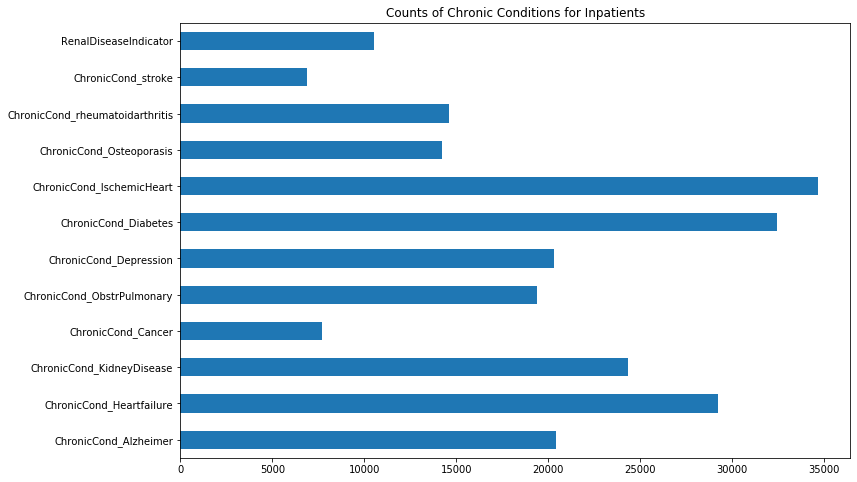

In [17]:
# Counting the cases of chronic conditions for inpatients
inpatient.agg({'ChronicCond_Alzheimer' : 'sum',
                'ChronicCond_Heartfailure' : 'sum',
                'ChronicCond_KidneyDisease' : 'sum',
                'ChronicCond_Cancer' : 'sum',
                'ChronicCond_ObstrPulmonary' : 'sum',
                'ChronicCond_Depression' : 'sum',
                'ChronicCond_Diabetes' : 'sum',
                'ChronicCond_IschemicHeart' : 'sum',
                'ChronicCond_Osteoporasis' : 'sum',
                'ChronicCond_rheumatoidarthritis' : 'sum',
                'ChronicCond_stroke' : 'sum',
                'RenalDiseaseIndicator' : 'sum'}).plot(figsize = (12, 8), kind='barh', title = 'Counts of Chronic Conditions for Inpatients')


### From the prospect of the insurance company, the reimbursed amounts are their coverage on the claims. Please analyze the patterns of the total reimbursed amounts (or average reimbursed amounts/visit) vs different types of patients.

In [18]:
# Calculating total annual reimbursement amount by adding annual reimbursement amount of inpatients and outpatient
full_data['TotalAnnualReimbursementAmt'] = full_data['IPAnnualReimbursementAmt'] + full_data['OPAnnualReimbursementAmt']


In [23]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import Figure, Bar, Histogram, Layout

# Graphing average amount of total annual reimbursement amount for every chronic conditions
group_1 = full_data[['ChronicCond_Alzheimer', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Alzheimer')
group_2 = full_data[['ChronicCond_Heartfailure', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Heartfailure')
group_3 = full_data[['ChronicCond_KidneyDisease', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_KidneyDisease')
group_4 = full_data[['ChronicCond_Cancer', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Cancer')
group_5 = full_data[['ChronicCond_ObstrPulmonary', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_ObstrPulmonary')
group_6 = full_data[['ChronicCond_Depression', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Depression')
group_7 = full_data[['ChronicCond_Diabetes', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Diabetes')
group_8 = full_data[['ChronicCond_IschemicHeart', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_IschemicHeart')
group_9 = full_data[['ChronicCond_Osteoporasis', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Osteoporasis')
group_10 = full_data[['ChronicCond_rheumatoidarthritis', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_rheumatoidarthritis')
group_11 = full_data[['ChronicCond_stroke', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_stroke')
group_12 = full_data[['RenalDiseaseIndicator', 'TotalAnnualReimbursementAmt']].groupby('RenalDiseaseIndicator')

cc_1 = group_1.get_group(1).ChronicCond_Alzheimer
cc_2 = group_2.get_group(1).ChronicCond_Heartfailure
cc_3 = group_3.get_group(1).ChronicCond_KidneyDisease
cc_4 = group_4.get_group(1).ChronicCond_Cancer
cc_5 = group_5.get_group(1).ChronicCond_ObstrPulmonary
cc_6 = group_6.get_group(1).ChronicCond_Depression
cc_7 = group_7.get_group(1).ChronicCond_Diabetes
cc_8 = group_8.get_group(1).ChronicCond_IschemicHeart
cc_9 = group_9.get_group(1).ChronicCond_Osteoporasis
cc_10 = group_10.get_group(1).ChronicCond_rheumatoidarthritis
cc_11 = group_11.get_group(1).ChronicCond_stroke
cc_12 = group_12.get_group(1).RenalDiseaseIndicator

amt_1 = group_1.get_group(1).TotalAnnualReimbursementAmt
amt_2 = group_2.get_group(1).TotalAnnualReimbursementAmt
amt_3 = group_3.get_group(1).TotalAnnualReimbursementAmt
amt_4 = group_4.get_group(1).TotalAnnualReimbursementAmt
amt_5 = group_5.get_group(1).TotalAnnualReimbursementAmt
amt_6 = group_6.get_group(1).TotalAnnualReimbursementAmt
amt_7 = group_7.get_group(1).TotalAnnualReimbursementAmt
amt_8 = group_8.get_group(1).TotalAnnualReimbursementAmt
amt_9 = group_9.get_group(1).TotalAnnualReimbursementAmt
amt_10 = group_10.get_group(1).TotalAnnualReimbursementAmt
amt_11 = group_11.get_group(1).TotalAnnualReimbursementAmt
amt_12 = group_12.get_group(1).TotalAnnualReimbursementAmt

getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':1}

trace1 = Histogram(x=cc_1,
                   y=amt_1, 
                   histfunc='avg',
                   name='Alzheimer')

trace2 = Histogram(x=cc_2,
                   y=amt_2, 
                   histfunc='avg',
                   name='Heart Failure')

trace3 = Histogram(x=cc_3,
                   y=amt_3, 
                   histfunc='avg',
                   name='Kidney Disease')

trace4 = Histogram(x=cc_4,
                   y=amt_4, 
                   histfunc='avg',
                   name='Cancer')

trace5 = Histogram(x=cc_5,
                   y=amt_5, 
                   histfunc='avg',
                   name='ObstrPulmonary')

trace6 = Histogram(x=cc_6,
                   y=amt_6, 
                   histfunc='avg',
                   name='Depression')

trace7 = Histogram(x=cc_7,
                   y=amt_7, 
                   histfunc='avg',
                   name='Diabetes')

trace8 = Histogram(x=cc_8,
                   y=amt_8, 
                   histfunc='avg',
                   name='IschemicHeart')

trace9 = Histogram(x=cc_9,
                   y=amt_9, 
                   histfunc='avg',
                   name='Osteoporasis')

trace10 = Histogram(x=cc_10,
                   y=amt_10, 
                   histfunc='avg',
                   name='Rheumatoidarthritis')

trace11 = Histogram(x=cc_11,
                   y=amt_11, 
                   histfunc='avg',
                   name='Stroke')

trace12 = Histogram(x=cc_12,
                   y=amt_12, 
                   histfunc='avg',
                   name='RenalDisease')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = Layout(title="Average of Annual Reimbursement Amount on Types of Patients",
                xaxis=dict(title="Types of Patients", autorange=True, showgrid=False, ticks='', showticklabels=False),
                yaxis=dict(title="Average of Annual Reimbursement Amount"),
                bargroupgap=0.1)
fig = Figure(data=data, layout=layout)

# plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400, image = 'svg')

### From the prospect of the providers, the sum of reimbursed amounts and deductibles are flowing to the providers. Based on this, analyze which types of patients contribute more to the providers in terms of the aggregate charges or the average charge per visit.

In [24]:
# Calculating total charges by adding total annual reimbursement amount and annual deductible amount for both inpatients and outpatients
full_data['TotalCharges'] = full_data['TotalAnnualReimbursementAmt'] + full_data['IPAnnualDeductibleAmt'] + full_data['OPAnnualDeductibleAmt']


In [25]:
# Graphing average amount of total charges for every chronic conditions

group_1 = full_data[['ChronicCond_Alzheimer', 'TotalCharges']].groupby('ChronicCond_Alzheimer')
group_2 = full_data[['ChronicCond_Heartfailure', 'TotalCharges']].groupby('ChronicCond_Heartfailure')
group_3 = full_data[['ChronicCond_KidneyDisease', 'TotalCharges']].groupby('ChronicCond_KidneyDisease')
group_4 = full_data[['ChronicCond_Cancer', 'TotalCharges']].groupby('ChronicCond_Cancer')
group_5 = full_data[['ChronicCond_ObstrPulmonary', 'TotalCharges']].groupby('ChronicCond_ObstrPulmonary')
group_6 = full_data[['ChronicCond_Depression', 'TotalCharges']].groupby('ChronicCond_Depression')
group_7 = full_data[['ChronicCond_Diabetes', 'TotalCharges']].groupby('ChronicCond_Diabetes')
group_8 = full_data[['ChronicCond_IschemicHeart', 'TotalCharges']].groupby('ChronicCond_IschemicHeart')
group_9 = full_data[['ChronicCond_Osteoporasis', 'TotalCharges']].groupby('ChronicCond_Osteoporasis')
group_10 = full_data[['ChronicCond_rheumatoidarthritis', 'TotalCharges']].groupby('ChronicCond_rheumatoidarthritis')
group_11 = full_data[['ChronicCond_stroke', 'TotalCharges']].groupby('ChronicCond_stroke')
group_12 = full_data[['RenalDiseaseIndicator', 'TotalCharges']].groupby('RenalDiseaseIndicator')

cc_1 = group_1.get_group(1).ChronicCond_Alzheimer
cc_2 = group_2.get_group(1).ChronicCond_Heartfailure
cc_3 = group_3.get_group(1).ChronicCond_KidneyDisease
cc_4 = group_4.get_group(1).ChronicCond_Cancer
cc_5 = group_5.get_group(1).ChronicCond_ObstrPulmonary
cc_6 = group_6.get_group(1).ChronicCond_Depression
cc_7 = group_7.get_group(1).ChronicCond_Diabetes
cc_8 = group_8.get_group(1).ChronicCond_IschemicHeart
cc_9 = group_9.get_group(1).ChronicCond_Osteoporasis
cc_10 = group_10.get_group(1).ChronicCond_rheumatoidarthritis
cc_11 = group_11.get_group(1).ChronicCond_stroke
cc_12 = group_12.get_group(1).RenalDiseaseIndicator

amt_1 = group_1.get_group(1).TotalCharges
amt_2 = group_2.get_group(1).TotalCharges
amt_3 = group_3.get_group(1).TotalCharges
amt_4 = group_4.get_group(1).TotalCharges
amt_5 = group_5.get_group(1).TotalCharges
amt_6 = group_6.get_group(1).TotalCharges
amt_7 = group_7.get_group(1).TotalCharges
amt_8 = group_8.get_group(1).TotalCharges
amt_9 = group_9.get_group(1).TotalCharges
amt_10 = group_10.get_group(1).TotalCharges
amt_11 = group_11.get_group(1).TotalCharges
amt_12 = group_12.get_group(1).TotalCharges

getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':1}

trace1 = Histogram(x=cc_1,
                   y=amt_1, 
                   histfunc='avg',
                   name='Alzheimer')

trace2 = Histogram(x=cc_2,
                   y=amt_2, 
                   histfunc='avg',
                   name='Heart Failure')

trace3 = Histogram(x=cc_3,
                   y=amt_3, 
                   histfunc='avg',
                   name='Kidney Disease')

trace4 = Histogram(x=cc_4,
                   y=amt_4, 
                   histfunc='avg',
                   name='Cancer')

trace5 = Histogram(x=cc_5,
                   y=amt_5, 
                   histfunc='avg',
                   name='ObstrPulmonary')

trace6 = Histogram(x=cc_6,
                   y=amt_6, 
                   histfunc='avg',
                   name='Depression')

trace7 = Histogram(x=cc_7,
                   y=amt_7, 
                   histfunc='avg',
                   name='Diabetes')

trace8 = Histogram(x=cc_8,
                   y=amt_8, 
                   histfunc='avg',
                   name='IschemicHeart')

trace9 = Histogram(x=cc_9,
                   y=amt_9, 
                   histfunc='avg',
                   name='Osteoporasis')

trace10 = Histogram(x=cc_10,
                   y=amt_10, 
                   histfunc='avg',
                   name='Rheumatoidarthritis')

trace11 = Histogram(x=cc_11,
                   y=amt_11, 
                   histfunc='avg',
                   name='Stroke')

trace12 = Histogram(x=cc_12,
                   y=amt_12, 
                   histfunc='avg',
                   name='RenalDisease')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = Layout(title="Average of Total Charges on Types of Patients",
                xaxis=dict(title="Types of Patients", autorange=True, showgrid=False, ticks='', showticklabels=False),
                yaxis=dict(title="Average of Total Charges"),
                bargroupgap=0.1)
fig = Figure(data=data, layout=layout)

# plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

## Question 5 : From Which Providers Do the Duplicated Claims Come From?

### An easier type of frauds is to submit duplicated claims using stolen patient IDs.  While multiple claims with identical information are not always fraudulent, the prevalence of these duplicated records would signal potential fraud activities. 

### Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data. 

In [34]:
# Dataframe of duplicated data for inpatients
inpatient_d = inpatient[inpatient.duplicated(['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], keep = False)]
inpatient_d


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
34,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,1,1,1,2,2,20180,1068,33210,5858
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,1,1,1,2,2,20180,1068,33210,5858
52,BENE11178,CLM40640,2009-03-01,2009-03-08,PRV57437,2000,PHY323517,NaN,NaN,2009-03-01,...,1,1,1,1,1,2,2000,1068,400,40
1039,BENE14664,CLM72395,2009-10-18,2009-11-01,PRV57334,15000,PHY386101,PHY385952,PHY345577,2009-10-18,...,1,1,1,2,2,2,15000,1068,1110,180
2021,BENE18047,CLM59863,2009-07-16,2009-07-21,PRV56793,8000,PHY375144,PHY410078,PHY397436,2009-07-16,...,1,1,1,2,1,2,33250,3204,1820,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39610,BENE156020,CLM31010,2008-12-01,2009-01-03,PRV52019,11000,PHY393952,PHY348831,PHY416093,2008-12-01,...,1,1,1,2,1,2,16320,2136,13460,1698
39612,BENE156020,CLM82204,2008-12-01,2009-01-06,PRV52019,11000,PHY393952,PHY348831,PHY416093,2008-12-01,...,1,1,1,2,1,2,16320,2136,13460,1698
39620,BENE156059,CLM63126,2009-08-08,2009-08-11,PRV52027,3000,PHY331910,NaN,NaN,2009-08-08,...,2,1,2,2,2,2,3090,1068,10,0
39817,BENE156866,CLM34949,2009-01-21,2009-01-27,PRV57409,20000,PHY415120,PHY423087,NaN,2009-01-21,...,2,1,1,2,1,2,76600,4272,26610,3478


In [12]:
# Dataframe of duplicated data for inpatients
inpatient_dd = inpatient[inpatient.duplicated(['BeneID', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], keep = False)]
inpatient_dd = pd.merge(inpatient_dd, train_potentialfraud, on = 'Provider', how = 'left')
inpatient_dd

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,1,1,2,2,20180,1068,33210,5858,Yes
1,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,1,1,2,2,20180,1068,33210,5858,Yes
2,BENE24807,CLM31703,2008-12-31,2009-01-09,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,...,1,1,1,1,2,17000,2136,13320,1148,Yes
3,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,...,1,1,1,1,2,17000,2136,13320,1148,Yes
4,BENE39346,CLM39007,2009-02-18,2009-02-23,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,...,1,1,2,1,2,19000,1068,19180,1708,Yes
5,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,...,1,1,2,1,2,19000,1068,19180,1708,Yes
6,BENE44545,CLM34340,2009-01-18,2009-01-25,PRV52843,14000,PHY365072,NaN,NaN,2009-01-18,...,1,1,2,1,1,14350,1068,14010,1068,Yes
7,BENE44545,CLM82209,2009-01-18,2009-01-27,PRV52843,14000,PHY365072,NaN,NaN,2009-01-18,...,1,1,2,1,1,14350,1068,14010,1068,Yes
8,BENE47786,CLM52970,2009-05-27,2009-06-01,PRV52828,14000,PHY391167,NaN,NaN,2009-05-27,...,1,1,2,1,2,18450,2136,17470,1488,Yes
9,BENE47786,CLM82208,2009-05-27,2009-06-04,PRV52828,14000,PHY391167,NaN,NaN,2009-05-27,...,1,1,2,1,2,18450,2136,17470,1488,Yes


In [13]:
outpatient_dd = outpatient[outpatient.duplicated(['BeneID', 'Provider', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], keep = False)]
outpatient_dd = pd.merge(outpatient_dd, train_potentialfraud, on = 'Provider', how = 'left')
outpatient_dd

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11017,CLM198169,2009-02-16,2009-02-16,PRV54761,10,PHY360727,NaN,PHY369553,NaN,...,1,1,2,1,1,22000,2136,1400,840,No
1,BENE11017,CLM448107,2009-07-02,2009-07-02,PRV54786,80,PHY371562,NaN,PHY371562,NaN,...,1,1,2,1,1,22000,2136,1400,840,Yes
2,BENE11548,CLM160269,2009-01-27,2009-01-27,PRV53269,100,PHY320803,NaN,NaN,NaN,...,1,1,1,2,2,3000,1068,3460,740,Yes
3,BENE11548,CLM677316,2009-11-12,2009-11-12,PRV53269,200,PHY424392,PHY354051,PHY313976,NaN,...,1,1,1,2,2,3000,1068,3460,740,Yes
4,BENE11632,CLM131727,2009-01-11,2009-01-11,PRV51204,60,PHY360271,NaN,NaN,NaN,...,1,1,2,1,2,0,0,2800,900,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,BENE158804,CLM725990,2009-12-12,2009-12-12,PRV52571,80,PHY384394,NaN,NaN,NaN,...,1,1,2,2,2,77900,4272,24410,6440,No
1803,BENE158942,CLM552185,2009-08-29,2009-08-29,PRV54071,60,PHY359144,NaN,NaN,NaN,...,2,2,2,2,2,0,0,2610,690,No
1804,BENE158942,CLM734018,2009-12-17,2009-12-17,PRV54071,200,PHY401484,NaN,PHY342961,NaN,...,2,2,2,2,2,0,0,2610,690,No
1805,BENE159070,CLM161174,2009-01-27,2009-01-27,PRV55598,70,PHY364477,NaN,PHY364477,NaN,...,1,1,2,2,2,0,0,300,70,No


In [35]:
# Dataframe of duplicated data for outpatients
outpatient_d = outpatient[outpatient.duplicated(['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], keep = False)]
outpatient_d


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
40475,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,NaN,...,2,2,1,2,2,2,0,0,90,40
40476,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,NaN,...,2,2,1,2,2,2,0,0,90,40
40477,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,NaN,...,2,1,1,1,1,2,0,0,1810,760
40479,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,NaN,...,2,1,1,1,1,2,0,0,1810,760
40483,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,NaN,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558199,BENE159198,CLM172248,2009-02-02,2009-02-02,PRV53676,400,PHY361063,PHY361063,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558200,BENE159198,CLM189011,2009-02-11,2009-02-11,PRV53672,3300,PHY390366,NaN,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558201,BENE159198,CLM255268,2009-03-19,2009-03-19,PRV53672,70,PHY317739,PHY317739,PHY423886,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870


### Are these potentially fradulent providers duplicating their own medical records, or are they using the records from the other providers?

In [36]:
# totalpatient_d = Duplicated inpatient + Duplicated outpatient
totalpatient_d = pd.concat([inpatient_d, outpatient_d], axis=0)

In [25]:
# Total number of unique providers in duplicated data
len(totalpatient_d['Provider'].unique())

4794

In [26]:
# 18 providers that duplicate their own medical records for inpatient data
sum(inpatient_d['Provider'].value_counts() > 1)

18

In [27]:
# 50 providers using the records from the other providers for inpatient data
sum(inpatient_d['Provider'].value_counts() == 1)

50

In [28]:
# 4451 providers that duplicate their own medical records for outpatient data
sum(outpatient_d['Provider'].value_counts() > 1)

4451

In [29]:
# 335 providers using the records from the other providers for outpatient data
sum(outpatient_d['Provider'].value_counts() == 1)

335

### Assuming that the claimStartDates are authentic, identify the providers which are the information receivers. Identify the providers which are the information givers.

In [30]:
# totalpatient_d.groupby(["Provider"]).apply(lambda x: x.sort_values(["ClaimStartDt"]))

### Summarize the duplicate record counts/provider and study if the statistics have different distributions between honest and potentialfraud providers.

In [31]:
# providers_fraud = Duplicated total patients combined with being potentially fraud
providers_fraud = pd.merge(totalpatient_d, train_potentialfraud, on='Provider', how='left')

In [32]:
# Count of providers depending on whether they were labeled as potentially fraud or not
providers_fraud.groupby(['PotentialFraud']).agg({'Provider' : 'nunique'})

,Provider
PotentialFraud,
No,4334
Yes,460


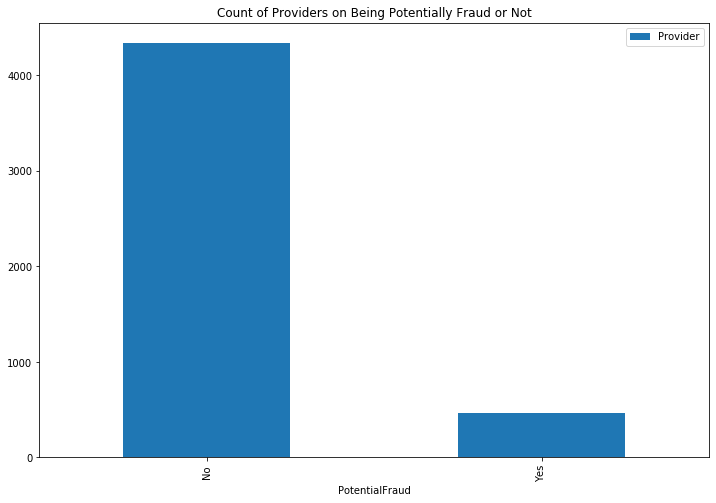

In [33]:
providers_fraud.groupby(['PotentialFraud']).agg({'Provider' : 'nunique'}).plot(kind = 'bar', figsize = (12, 8), title = 'Count of Providers on Being Potentially Fraud or Not')

### Do these potentially fraud providers reuse doctor IDs and/or patient IDs?  If so, these fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to the other types of fraudulent activities.

In [34]:
# All the train data merged
full_data_fraud = pd.merge(full_data, train_potentialfraud, on='Provider', how='left')

In [36]:
# Potentially fraud cases from the complete train data
potential_fraud_providers = full_data_fraud.loc[full_data_fraud.PotentialFraud == 'Yes']

In [37]:
# Total of 83997 BeneIDs in all potentially fraud cases
potential_fraud_providers['BeneID'].nunique()

83997

In [38]:
# Total of 20592 attending physicials in all potentially fraud cases
potential_fraud_providers['AttendingPhysician'].nunique()

20592

In [39]:
# Potentially fraud cases from the duplicated diagnosis/procedure data
potential_fraud_d = providers_fraud.loc[providers_fraud.PotentialFraud == 'Yes']

In [40]:
# Out of 83997 all potentially fraud BeneIDs, 19337 were duplicated at least more than once
sum(potential_fraud_d['BeneID'].value_counts() > 1)


19337

In [41]:
# Out of 20592 all potentially fraud Attending Physician, 5990 were duplicated at least more than once
sum(potential_fraud_d['AttendingPhysician'].value_counts() > 1)


5990

### Do these duplicated records show any anomaly in terms of geographic locations? Even though the original data doesn't specify the providers nor the doctors' practice locations, one may use the majority of the patients' residence state/county information to infer their physical locations.

In [42]:
# Counts for each state for potentially fraud cases from duplicated data
totalpatient_d['State'].value_counts()

5     21045
10    15975
33    14395
45    13741
14    10051
39    10049
23     8928
36     8650
34     7772
11     6920
31     6512
49     6165
44     6037
15     5830
22     5617
26     5373
50     4911
21     4629
42     4375
18     4284
1      4108
52     4048
3      3872
19     3126
16     3118
24     3110
4      3082
6      3013
37     2821
25     2661
38     2296
7      2189
17     1971
51     1870
54     1771
28     1756
20     1629
32     1510
46     1402
13     1170
30     1084
43      816
29      796
27      792
12      775
47      771
8       606
41      473
53      457
35      394
2       285
9       224
Name: State, dtype: int64

In [43]:
# Counts for each county for potentially fraud cases from duplicated data
totalpatient_d['County'].value_counts()

200    6605
10     5586
20     5329
470    5052
60     5007
       ... 
931       2
14        2
562       1
804       1
712       1
Name: County, Length: 305, dtype: int64

### Base on your best knowledge of suspicious activities in duplicating the patient claims, flag the providers accordingly. Compare with the **PotentialFraud** flags offered by the dataset and discuss.

In [44]:
# Counts for each state for potentially fraud cases from all the training data 
potential_fraud_providers['State'].value_counts()

5     30335
10    17512
33    17492
39    11448
45    10135
31     9112
49     8613
23     8538
14     8509
22     7798
44     6709
36     6381
26     5301
50     4782
15     4635
34     4385
11     4123
6      3666
1      3525
24     3453
42     3180
16     2733
21     2576
46     2124
3      2030
52     1953
4      1945
37     1780
32     1739
19     1687
18     1679
7      1470
30     1184
20     1118
17     1016
54      957
13      858
25      819
38      770
8       612
27      576
28      516
53      478
51      466
29      429
47      402
43      316
12      308
2       207
9       178
41      156
35       82
Name: State, dtype: int64

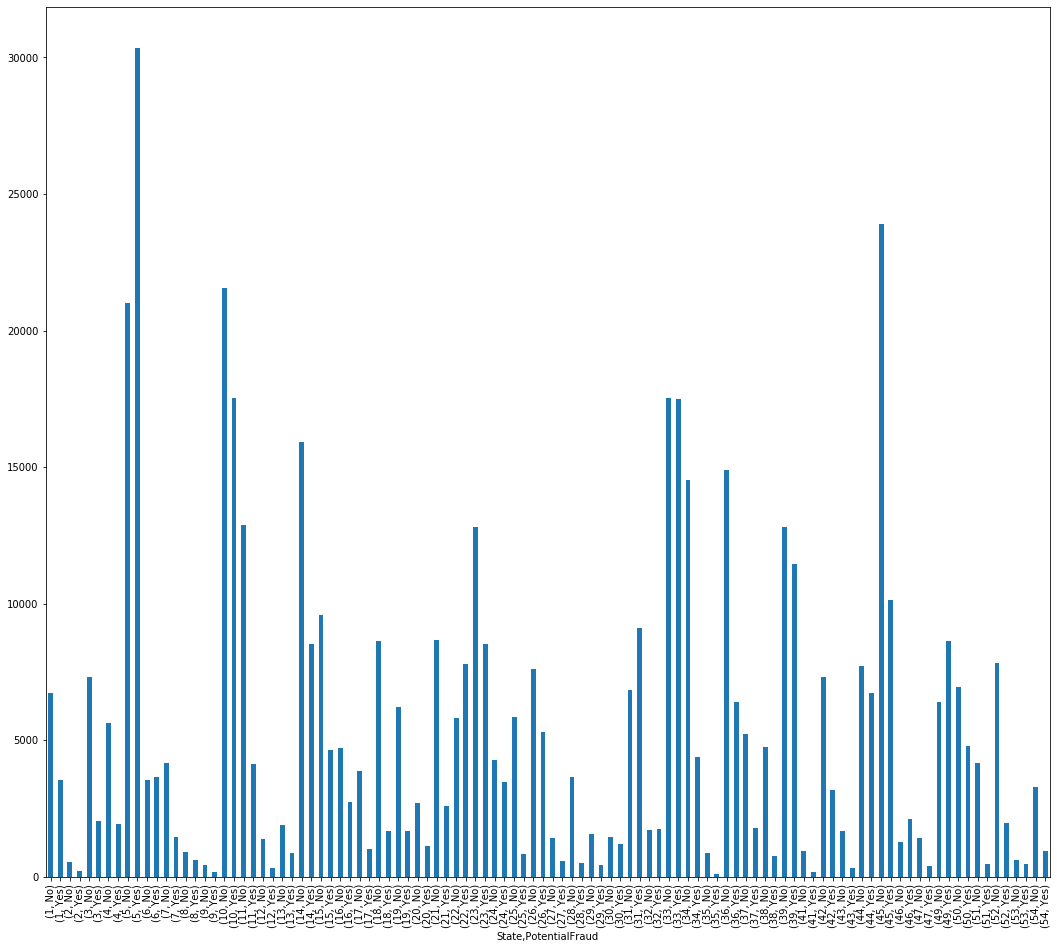

In [253]:
full_data_fraud.groupby(['State', 'PotentialFraud'])['PotentialFraud'].count().plot(kind = 'bar', figsize = (18, 16))


In [45]:
# Counts for each county for potentially fraud cases from all the training data 
potential_fraud_providers['County'].value_counts()

200    10078
470     7048
400     5962
590     5814
0       4897
       ...  
931        1
834        1
783        1
361        1
884        1
Name: County, Length: 271, dtype: int64

In [254]:
full_data_fraud.groupby(['County', 'PotentialFraud'])['PotentialFraud'].count()


County  PotentialFraud
0       No                 6584
        Yes                4897
1       No                    8
        Yes                   4
10      No                10750
                          ...  
994     Yes                  87
996     No                   13
        Yes                  56
999     No                  666
        Yes                 290
Name: PotentialFraud, Length: 582, dtype: int64

- For potentially fraud cases, whether it is duplicated or not, states #5, #10, #33 and county #200 seem to have the highest count

## Feature Engineering

### Creating trainProvider

In [509]:
patient = full_data.groupby(['Provider','BeneID'])['BeneID'].count().reset_index(name='NumOfPatients').\
groupby('Provider')['NumOfPatients'].count().reset_index()

trainProvider = pd.merge(patient, train_potentialfraud, on='Provider')
trainProvider.sample(2)

,Provider,NumOfPatients,PotentialFraud
2693,PRV54353,31,No
75,PRV51101,3,No


### Adding the Count of Patients with Different Number of Chronic Conditions 

In [437]:
full_data['NumChronicCond'] = full_data['ChronicCond_Alzheimer'] + full_data['ChronicCond_Heartfailure'] + full_data['ChronicCond_KidneyDisease'] + full_data['ChronicCond_Cancer'] + full_data['ChronicCond_ObstrPulmonary'] + full_data['ChronicCond_Depression'] + full_data ['ChronicCond_Diabetes'] + full_data['ChronicCond_IschemicHeart'] + full_data['ChronicCond_Osteoporasis'] + full_data['ChronicCond_rheumatoidarthritis'] + full_data['ChronicCond_stroke'] + full_data['RenalDiseaseIndicator']


In [507]:
chronicConditions = full_data.groupby(['Provider', 'BeneID'])['NumChronicCond'].value_counts().reset_index(name = 'NumChronicCondCount')
chronicConditions['NumChronicCondCount'] = chronicConditions['NumChronicCondCount'].apply(lambda x: 1 if x >= 1 else 0)
chronicConditions = chronicConditions.groupby('Provider')['NumChronicCond'].value_counts().reset_index(name = 'NumChronicCondCount')


In [508]:
chronicConditions = chronicConditions.groupby(['Provider', 'NumChronicCond']).NumChronicCondCount.sum()
chronicConditions = chronicConditions.unstack(level='NumChronicCond').reset_index()
chronicConditions = chronicConditions.rename({0 : 'ChronicCond0', 
                                              1 : 'ChronicCond1', 
                                              2 : 'ChronicCond2',
                                              3 : 'ChronicCond3',
                                              4 : 'ChronicCond4',
                                              5 : 'ChronicCond5',
                                              6 : 'ChronicCond6',
                                              7 : 'ChronicCond7',
                                              8 : 'ChronicCond8',
                                              9 : 'ChronicCond9',
                                              10 : 'ChronicCond10',
                                              11 : 'ChronicCond11',
                                              12 : 'ChronicCond12'}, axis=1)
chronicConditions.fillna(0, inplace=True)
chronicConditions


NumChronicCond,Provider,ChronicCond0,ChronicCond1,ChronicCond2,ChronicCond3,ChronicCond4,ChronicCond5,ChronicCond6,ChronicCond7,ChronicCond8,ChronicCond9,ChronicCond10,ChronicCond11,ChronicCond12
0,PRV51001,0.0,1.0,0.0,2.0,4.0,2.0,6.0,4.0,3.0,1.0,0.0,1.0,0.0
1,PRV51003,7.0,1.0,14.0,22.0,15.0,20.0,12.0,11.0,8.0,5.0,2.0,0.0,0.0
2,PRV51004,8.0,12.0,13.0,27.0,11.0,16.0,18.0,11.0,12.0,8.0,2.0,0.0,0.0
3,PRV51005,38.0,52.0,57.0,72.0,69.0,55.0,59.0,48.0,27.0,17.0,1.0,0.0,0.0
4,PRV51007,5.0,5.0,8.0,7.0,8.0,8.0,5.0,6.0,6.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,1.0,1.0,4.0,1.0,7.0,3.0,3.0,0.0,3.0,1.0,0.0,0.0
5406,PRV57760,0.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5407,PRV57761,2.0,5.0,9.0,6.0,9.0,7.0,6.0,8.0,6.0,7.0,2.0,0.0,0.0
5408,PRV57762,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [510]:
trainProvider = pd.merge(trainProvider, chronicConditions, on = 'Provider', how = 'left')
trainProvider.sample(2)

,Provider,NumOfPatients,PotentialFraud,ChronicCond0,ChronicCond1,ChronicCond2,ChronicCond3,ChronicCond4,ChronicCond5,ChronicCond6,ChronicCond7,ChronicCond8,ChronicCond9,ChronicCond10,ChronicCond11,ChronicCond12
4183,PRV56235,153,No,5.0,10.0,19.0,19.0,26.0,22.0,18.0,10.0,12.0,8.0,4.0,0.0,0.0
4994,PRV57259,38,No,1.0,5.0,8.0,7.0,2.0,1.0,1.0,9.0,2.0,2.0,0.0,0.0,0.0


### Adding the Average of Patients' Age When They Were Served per Provider

In [445]:
avgage = full_data.groupby(['Provider', 'BeneID'])['AgeWhenServed'].mean().reset_index(name = "AvgAgeWhenServed").dropna().groupby('Provider')['AvgAgeWhenServed'].mean().reset_index()

trainProvider = pd.merge(trainProvider, avgage, on = 'Provider', how = 'left')
trainProvider.sample(2)

,Provider,NumOfPatients,PotentialFraud,LowChronicCond,MidChronicCond,HighChronicCond,AvgAgeWhenServed
2095,PRV53616,41,No,9,30,1,72.487805
868,PRV52084,32,No,8,22,2,72.531250


Text(0, 0.5, 'Average Age of the Patients')

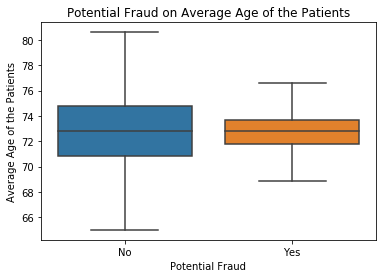

In [446]:
ax7 = sns.boxplot(x = 'PotentialFraud', y = 'AvgAgeWhenServed', data = trainProvider, showfliers = False)
ax7.set_title('Potential Fraud on Average Age of the Patients')
ax7.set_xlabel('Potential Fraud')
ax7.set_ylabel('Average Age of the Patients')


### Adding the count of Duplicated BeneID per Provider

In [447]:
duplicatedBeneID = totalpatient_d.groupby('Provider')['BeneID'].value_counts().reset_index(name = "ValueCount")
duplicatedBeneID = duplicatedBeneID.loc[duplicatedBeneID['ValueCount'] > 1]
duplicatedBeneID = duplicatedBeneID.groupby('Provider')['BeneID'].count().reset_index(name = "NumOfDuplicatedBeneID")

trainProvider = pd.merge(trainProvider, duplicatedBeneID, on = 'Provider', how = 'left')
trainProvider['NumOfDuplicatedBeneID'].fillna(0, inplace=True)
trainProvider.sample(2)

,Provider,NumOfPatients,PotentialFraud,LowChronicCond,MidChronicCond,HighChronicCond,AvgAgeWhenServed,NumOfDuplicatedBeneID
1586,PRV52966,3,No,1,2,0,73.666667,0.0
372,PRV51470,27,No,8,9,6,72.333333,0.0


Text(0, 0.5, 'Number of Duplicated Bene ID')

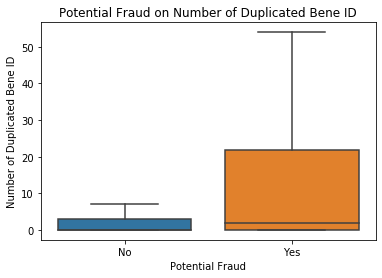

In [448]:
ax8 = sns.boxplot(x = 'PotentialFraud', y = 'NumOfDuplicatedBeneID', data = trainProvider, showfliers = False)
ax8.set_title('Potential Fraud on Number of Duplicated Bene ID')
ax8.set_xlabel('Potential Fraud')
ax8.set_ylabel('Number of Duplicated Bene ID')


### Adding the count of Duplicated Attending Physician per Provider

In [449]:
duplicatedPhysician = totalpatient_d.groupby('Provider')['AttendingPhysician'].value_counts().reset_index(name = "ValueCount")
duplicatedPhysician = duplicatedPhysician.loc[duplicatedPhysician['ValueCount'] > 1]
duplicatedPhysician = duplicatedPhysician.groupby('Provider')['AttendingPhysician'].count().reset_index(name = "NumOfDuplicatedAttendingPhysician")

trainProvider = pd.merge(trainProvider, duplicatedPhysician, on = 'Provider', how = 'left')
trainProvider['NumOfDuplicatedAttendingPhysician'].fillna(0, inplace=True)
trainProvider.sample(2)

,Provider,NumOfPatients,PotentialFraud,LowChronicCond,MidChronicCond,HighChronicCond,AvgAgeWhenServed,NumOfDuplicatedBeneID,NumOfDuplicatedAttendingPhysician
2606,PRV54246,27,No,11,15,1,69.768078,2.0,2.0
4481,PRV56603,4,No,0,4,0,59.000000,0.0,0.0


Text(0, 0.5, 'Number of Duplicated Attending Physician')

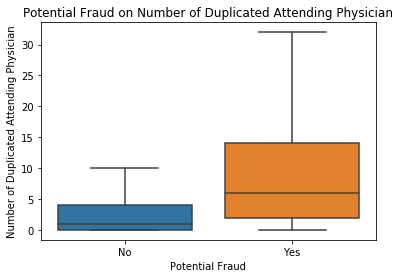

In [450]:
ax9 = sns.boxplot(x = 'PotentialFraud', y = 'NumOfDuplicatedAttendingPhysician', data = trainProvider, showfliers = False)
ax9.set_title('Potential Fraud on Number of Duplicated Attending Physician')
ax9.set_xlabel('Potential Fraud')
ax9.set_ylabel('Number of Duplicated Attending Physician')


### Adding count of Duplicated Claims per Provider

In [451]:
duplicatedClaims = totalpatient_d.groupby('Provider').agg({'ClaimID' : 'count'}).reset_index()
duplicatedClaims = duplicatedClaims.rename({'ClaimID' : 'NumOfDuplicatedClaims'}, axis=1)

trainProvider = pd.merge(trainProvider, duplicatedClaims, on = 'Provider', how = 'left')
trainProvider['NumOfDuplicatedClaims'].fillna(0, inplace=True)
trainProvider.sample(2)

#claimdiagnosiscode

#procedurecode

,Provider,NumOfPatients,PotentialFraud,LowChronicCond,MidChronicCond,HighChronicCond,AvgAgeWhenServed,NumOfDuplicatedBeneID,NumOfDuplicatedAttendingPhysician,NumOfDuplicatedClaims
1747,PRV53178,5,No,1,4,0,63.7,2.0,1.0,4.0
2080,PRV53598,8,No,1,6,1,67.5,0.0,0.0,0.0


Text(0, 0.5, 'Number of Duplicated Claims')

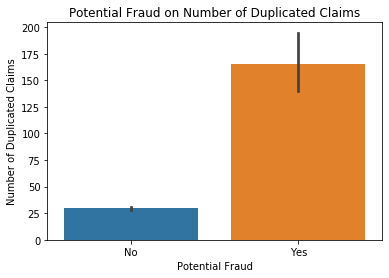

In [452]:
ax10 = sns.barplot(x = 'PotentialFraud', y = 'NumOfDuplicatedClaims', data = trainProvider)
ax10.set_title('Potential Fraud on Number of Duplicated Claims')
ax10.set_xlabel('Potential Fraud')
ax10.set_ylabel('Number of Duplicated Claims')


In [37]:
# Dataframe of duplicated data for outpatients
totalpatient_d[totalpatient_d.duplicated(['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10'], keep = False)]



,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
34,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,1,1,1,2,2,20180,1068,33210,5858
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,1,1,1,2,2,20180,1068,33210,5858
52,BENE11178,CLM40640,2009-03-01,2009-03-08,PRV57437,2000,PHY323517,NaN,NaN,2009-03-01,...,1,1,1,1,1,2,2000,1068,400,40
1039,BENE14664,CLM72395,2009-10-18,2009-11-01,PRV57334,15000,PHY386101,PHY385952,PHY345577,2009-10-18,...,1,1,1,2,2,2,15000,1068,1110,180
2021,BENE18047,CLM59863,2009-07-16,2009-07-21,PRV56793,8000,PHY375144,PHY410078,PHY397436,2009-07-16,...,1,1,1,2,1,2,33250,3204,1820,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558199,BENE159198,CLM172248,2009-02-02,2009-02-02,PRV53676,400,PHY361063,PHY361063,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558200,BENE159198,CLM189011,2009-02-11,2009-02-11,PRV53672,3300,PHY390366,NaN,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558201,BENE159198,CLM255268,2009-03-19,2009-03-19,PRV53672,70,PHY317739,PHY317739,PHY423886,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870


### Adding the Counts of Each Gender of Patients per Provider

In [484]:
gender = full_data.groupby(['Provider', 'BeneID', 'Gender'])['Gender'].count().reset_index(name = 'GenderCount')
gender['GenderCount'] = gender['GenderCount'].apply(lambda x: 1 if x >= 1 else 0)
gender = gender.groupby('Provider')['Gender'].value_counts().reset_index(name = 'GenderCount')

gender

,Provider,Gender,GenderCount
0,PRV51001,2,15
1,PRV51001,1,9
2,PRV51003,2,68
3,PRV51003,1,49
4,PRV51004,2,93
...,...,...,...
10348,PRV57761,2,34
10349,PRV57761,1,33
10350,PRV57762,1,1
10351,PRV57763,2,37


In [485]:
gender['Gender1'] = 0
gender['Gender2'] = 0

for index in gender.index:
    if gender['Gender'][index] == 1:
        gender['Gender1'][index] += gender['GenderCount'][index]
    if gender['Gender'][index] == 2:
        gender['Gender2'][index] += gender['GenderCount'][index]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [487]:
gender = gender.drop('Gender', axis = 1)
gender = gender.drop('GenderCount', axis = 1)
gender

,Provider,Gender1,Gender2
0,PRV51001,0,15
1,PRV51001,9,0
2,PRV51003,0,68
3,PRV51003,49,0
4,PRV51004,0,93
...,...,...,...
10348,PRV57761,0,34
10349,PRV57761,33,0
10350,PRV57762,1,0
10351,PRV57763,0,37


In [489]:
genderCount = gender.groupby('Provider').agg({'Gender1' : 'sum', 'Gender2' : 'sum'}).reset_index()

trainProvider = pd.merge(trainProvider, genderCount, on = 'Provider', how = 'left')
trainProvider.sample(2)

,Provider,NumOfPatients,PotentialFraud,LowChronicCond,MidChronicCond,HighChronicCond,AvgAgeWhenServed,NumOfDuplicatedBeneID,NumOfDuplicatedAttendingPhysician,NumOfDuplicatedClaims,Gender1,Gender2
2962,PRV54689,20,No,8,10,2,76.90000,0.0,0.0,10.0,9,11
2676,PRV54333,291,Yes,105,162,14,72.22795,11.0,31.0,135.0,125,166


### Adding the Counts of Each Race of Patients per Provider

In [521]:
race = full_data.groupby(['Provider', 'BeneID', 'Race'])['Race'].count().reset_index(name = 'RaceCount')
race['RaceCount'] = race['RaceCount'].apply(lambda x: 1 if x >= 1 else 0)
race = race.groupby('Provider')['Race'].value_counts().reset_index(name = 'RaceCount')

race

,Provider,Race,RaceCount
0,PRV51001,1,20
1,PRV51001,2,4
2,PRV51003,1,94
3,PRV51003,2,22
4,PRV51003,5,1
...,...,...,...
13615,PRV57761,3,1
13616,PRV57762,1,1
13617,PRV57763,1,56
13618,PRV57763,2,11


In [522]:
race['Race1'] = 0
race['Race2'] = 0
race['Race3'] = 0
race['Race5'] = 0

for index in race.index:
    if race['Race'][index] == 1:
        race['Race1'][index] += race['RaceCount'][index]
    if race['Race'][index] == 2:
        race['Race2'][index] += race['RaceCount'][index]
    if race['Race'][index] == 3:
        race['Race3'][index] += race['RaceCount'][index]
    if race['Race'][index] == 5:
        race['Race5'][index] += race['RaceCount'][index]
        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:




In [524]:
race = race.drop('Race', axis = 1)
race = race.drop('RaceCount', axis = 1)
race

,Provider,Race1,Race2,Race3,Race5
0,PRV51001,20,0,0,0
1,PRV51001,0,4,0,0
2,PRV51003,94,0,0,0
3,PRV51003,0,22,0,0
4,PRV51003,0,0,0,1
...,...,...,...,...,...
13615,PRV57761,0,0,1,0
13616,PRV57762,1,0,0,0
13617,PRV57763,56,0,0,0
13618,PRV57763,0,11,0,0


In [525]:
raceCount = race.groupby('Provider').agg({'Race1' : 'sum', 'Race2' : 'sum', 'Race3' : 'sum', 'Race5' : 'sum'}).reset_index()

trainProvider = pd.merge(trainProvider, raceCount, on = 'Provider', how = 'left')
trainProvider.sample(2)

,Provider,NumOfPatients,PotentialFraud,ChronicCond0,ChronicCond1,ChronicCond2,ChronicCond3,ChronicCond4,ChronicCond5,ChronicCond6,ChronicCond7,ChronicCond8,ChronicCond9,ChronicCond10,ChronicCond11,ChronicCond12,Race1,Race2,Race3,Race5
1541,PRV52912,14,No,2.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,11,3,0,0
4815,PRV57041,21,No,1.0,2.0,5.0,3.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,18,3,0,0


## Calling Pickle

In [6]:
train_data = pd.read_pickle("train_dataset.pkl")


In [7]:
train_data.drop(['WeeklyClaims', 'MonthlyClaims', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'DeductibleAmtPaid',
                'InscClaimAmtReimbursed'], axis=1, inplace=True)

In [14]:
opPhy = full_data.groupby(['Provider', 'OperatingPhysician'])['OperatingPhysician'].count().reset_index(name='a').\
groupby('Provider')['a'].count().reset_index(name= 'NumDistincOpPhy')
opPhy

,Provider,NumDistincOpPhy
0,PRV51001,5
1,PRV51003,7
2,PRV51004,19
3,PRV51005,6
4,PRV51007,5
...,...,...
4848,PRV57757,3
4849,PRV57759,1
4850,PRV57760,2
4851,PRV57761,5


In [15]:
train_data2 = pd.merge(train_data, opPhy, on='Provider', how='left')

In [16]:
train_data2['NumDistincOpPhy'] = train_data2['NumDistincOpPhy'].fillna(0)

In [17]:
otherPhy = full_data.groupby(['Provider', 'OtherPhysician'])['OtherPhysician'].count().reset_index(name='a').\
groupby('Provider')['a'].count().reset_index(name= 'NumDistincOtherPhy')
otherPhy

,Provider,NumDistincOtherPhy
0,PRV51001,8
1,PRV51003,22
2,PRV51004,26
3,PRV51005,4
4,PRV51007,7
...,...,...
4873,PRV57757,1
4874,PRV57759,1
4875,PRV57760,2
4876,PRV57761,2


In [18]:
train_data3 = pd.merge(train_data2, otherPhy, on='Provider', how='left')

In [19]:
train_data3['NumDistincOtherPhy'] = train_data3['NumDistincOtherPhy'].fillna(0)

In [20]:
train_data3

,Provider,PotentialFraud,DaysAdmitted,InscCoveredPercent,TotalClaimAmount,DailyTotalCharge,TotalAnnClaimAmt,NumOfDoctors,NumOfPatients,ServiceType,...,ChronicCond11,ChronicCond12,Gender1,Gender2,Race1,Race2,Race3,Race5,NumDistincOpPhy,NumDistincOtherPhy
0,PRV51001,No,2.440000,0.975656,4399.200000,1061.072000,21582.240000,14,24,both,...,1.0,0.0,9,15,20,4,0,0,5.0,8.0
1,PRV51003,Yes,4.674242,0.912167,5090.575758,1298.615410,11914.909091,44,117,both,...,0.0,0.0,49,68,94,22,0,1,7.0,22.0
2,PRV51004,No,2.429530,0.978485,352.214765,250.363050,7604.483221,38,138,outpatient,...,0.0,0.0,45,93,113,20,5,0,19.0,26.0
3,PRV51005,Yes,2.088412,0.980747,244.300429,196.533055,6749.216309,6,495,outpatient,...,0.0,0.0,208,287,382,110,3,0,6.0,4.0
4,PRV51007,No,1.958333,0.985303,513.527778,243.681944,5694.444444,10,58,both,...,0.0,0.0,27,31,47,11,0,0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,No,3.142857,0.983401,384.642857,200.629252,8548.428571,1,24,outpatient,...,0.0,0.0,13,11,19,1,0,4,1.0,1.0
5406,PRV57760,No,1.318182,1.000000,216.818182,216.022727,5520.545455,3,9,outpatient,...,0.0,0.0,6,3,7,2,0,0,2.0,2.0
5407,PRV57761,No,2.390244,0.935979,229.756098,157.134674,11248.414634,2,67,outpatient,...,0.0,0.0,33,34,58,5,1,3,5.0,2.0
5408,PRV57762,No,1.000000,1.000000,1900.000000,1900.000000,19008.000000,1,1,outpatient,...,0.0,0.0,1,0,1,0,0,0,0.0,0.0


In [49]:
train_data3.to_csv('train_data3.csv')

### Hypothesis Testing

In [2]:
from scipy import stats

In [32]:
F, p = stats.f_oneway(train_data3['ChronicCond0'], 
                      train_data3['ChronicCond1'], 
                      train_data3['ChronicCond2'], 
                      train_data3['ChronicCond3'], 
                      train_data3['ChronicCond4'],
                      train_data3['ChronicCond5'],
                      train_data3['ChronicCond6'],
                      train_data3['ChronicCond7'],
                      train_data3['ChronicCond8'],
                      train_data3['ChronicCond9'],
                      train_data3['ChronicCond10'],
                      train_data3['ChronicCond11'],
                      train_data3['ChronicCond12'])

print("p-value for significance is: ", p)

if p < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
# Number of Chrinoc Conditions have different distribution indicating that they are significantly different

p-value for significance is:  2.4000165848689806e-119
reject null hypothesis


In [46]:
contingency_table = pd.crosstab(train_data3["PotentialFraud"], train_data3["ServiceType"])
print('contingency_table :-\n',contingency_table)

Observed_Values = contingency_table.values 

b = stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

no_of_rows = len(contingency_table.iloc[0:2, 0])
no_of_columns = len(contingency_table.iloc[0, 0:2])
ddof = (no_of_rows-1) * (no_of_columns-1)
alpha = 0.05

from scipy.stats import chi2
chi_square = sum([(o-e) ** 2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

critical_value = chi2.ppf(q = 1-alpha, df = ddof)

p_value = 1 - chi2.cdf(x = chi_square_statistic, df = ddof)

print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('chi-square statistic:', chi_square_statistic)
print('critical_value:', critical_value)
print('p-value:', p_value)

if chi_square_statistic >= critical_value:
    print("Reject H0, There is a relationship between 2 categorical variables")
else:
    print("Retain H0, There is no relationship between 2 categorical variables")
    
if p_value <= alpha:
    print("Reject H0, There is a relationship between 2 categorical variables")
else:
    print("Retain H0, There is no relationship between 2 categorical variables")

contingency_table :-
 ServiceType     both  inpatient  outpatient
PotentialFraud                             
No              1298        354        3252
Yes              396         44          66
Expected Values :-
 [[1535.55933457  360.77486137 3007.66580407]
 [ 158.44066543   37.22513863  310.33419593]]
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 394.29851239760313
critical_value: 3.841458820694124
p-value: 0.0
Reject H0, There is a relationship between 2 categorical variables
Reject H0, There is a relationship between 2 categorical variables


In [52]:
contingency_table = pd.crosstab(train_data3["PotentialFraud"], train_data3["numDiffGroupDiagCode"])
print('contingency_table :-\n',contingency_table)

Observed_Values = contingency_table.values 

b = stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
# print("Expected Values :-\n",Expected_Values)

no_of_rows = len(contingency_table.iloc[0:2, 0])
no_of_columns = len(contingency_table.iloc[0, 0:138])
ddof = (no_of_rows-1) * (no_of_columns-1)
alpha = 0.05

from scipy.stats import chi2
chi_square = sum([(o-e) ** 2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

critical_value = chi2.ppf(q = 1-alpha, df = ddof)

p_value = 1 - chi2.cdf(x = chi_square_statistic, df = ddof)

print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('chi-square statistic:', chi_square_statistic)
print('critical_value:', critical_value)
print('p-value:', p_value)

if chi_square_statistic >= critical_value:
    print("Reject H0, There is a relationship between 2 categorical variables")
else:
    print("Retain H0, There is no relationship between 2 categorical variables")
    
if p_value <= alpha:
    print("Reject H0, There is a relationship between 2 categorical variables")
else:
    print("Retain H0, There is no relationship between 2 categorical variables")

contingency_table :-
 numDiffGroupDiagCode  0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    \
PotentialFraud                                                                 
No                     3252    213    169    166    127    118     90     91   
Yes                      66      2      1     12      9      7     10     22   

numDiffGroupDiagCode  8.0    9.0    ...  182.0  184.0  185.0  188.0  203.0  \
PotentialFraud                      ...                                      
No                       73     78  ...      0      0      0      0      0   
Yes                       9     11  ...      1      1      1      1      1   

numDiffGroupDiagCode  214.0  226.0  241.0  261.0  330.0  
PotentialFraud                                           
No                        0      0      0      0      0  
Yes                       1      1      1      1      1  

[2 rows x 138 columns]
Significance level:  0.05
Degree of Freedom:  137
chi-square statistic: 230.210337158485

In [53]:
contingency_table = pd.crosstab(train_data3["PotentialFraud"], train_data3["numDiffDiagnosisCode"])
print('contingency_table :-\n',contingency_table)

Observed_Values = contingency_table.values 

b = stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
# print("Expected Values :-\n",Expected_Values)

no_of_rows = len(contingency_table.iloc[0:2, 0])
no_of_columns = len(contingency_table.iloc[0, 0:207])
ddof = (no_of_rows-1) * (no_of_columns-1)
alpha = 0.05

from scipy.stats import chi2
chi_square = sum([(o-e) ** 2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

critical_value = chi2.ppf(q = 1-alpha, df = ddof)

p_value = 1 - chi2.cdf(x = chi_square_statistic, df = ddof)

print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('chi-square statistic:', chi_square_statistic)
print('critical_value:', critical_value)
print('p-value:', p_value)

if chi_square_statistic >= critical_value:
    print("Reject H0, There is a relationship between 2 categorical variables")
else:
    print("Retain H0, There is no relationship between 2 categorical variables")
    
if p_value <= alpha:
    print("Reject H0, There is a relationship between 2 categorical variables")
else:
    print("Retain H0, There is no relationship between 2 categorical variables")

contingency_table :-
 numDiffDiagnosisCode  0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    \
PotentialFraud                                                                 
No                      451    512    382    296    257    251    195    188   
Yes                       1      0      1      6      0      4      6      5   

numDiffDiagnosisCode  8.0    9.0    ...  303.0  317.0  339.0  343.0  354.0  \
PotentialFraud                      ...                                      
No                      173    159  ...      0      0      0      0      0   
Yes                       7      3  ...      1      1      1      1      1   

numDiffDiagnosisCode  359.0  375.0  399.0  401.0  582.0  
PotentialFraud                                           
No                        0      0      0      0      0  
Yes                       2      1      1      1      1  

[2 rows x 207 columns]
Significance level:  0.05
Degree of Freedom:  206
chi-square statistic: 97.2862906273286

In [55]:
contingency_table = pd.crosstab(train_data3["PotentialFraud"], train_data3["NumOfDuplicatedBeneID"])
print('contingency_table :-\n',contingency_table)

Observed_Values = contingency_table.values 

b = stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
# print("Expected Values :-\n",Expected_Values)

no_of_rows = len(contingency_table.iloc[0:2, 0])
no_of_columns = len(contingency_table.iloc[0, 0:137])
ddof = (no_of_rows-1) * (no_of_columns-1)
alpha = 0.05

from scipy.stats import chi2
chi_square = sum([(o-e) ** 2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

critical_value = chi2.ppf(q = 1-alpha, df = ddof)

p_value = 1 - chi2.cdf(x = chi_square_statistic, df = ddof)

print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('chi-square statistic:', chi_square_statistic)
print('critical_value:', critical_value)
print('p-value:', p_value)

if chi_square_statistic >= critical_value:
    print("Reject H0, There is a relationship between 2 categorical variables")
else:
    print("Retain H0, There is no relationship between 2 categorical variables")
    
if p_value <= alpha:
    print("Reject H0, There is a relationship between 2 categorical variables")
else:
    print("Retain H0, There is no relationship between 2 categorical variables")

contingency_table :-
 NumOfDuplicatedBeneID  0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    \
PotentialFraud                                                                  
No                      2684    629    335    189    160    113     89     96   
Yes                      174     57     28     17     15     10     10      6   

NumOfDuplicatedBeneID  8.0    9.0    ...  213.0  216.0  217.0  247.0  293.0  \
PotentialFraud                       ...                                      
No                        50     46  ...      0      0      0      0      0   
Yes                        8      4  ...      1      1      1      1      1   

NumOfDuplicatedBeneID  331.0  356.0  405.0  480.0  896.0  
PotentialFraud                                            
No                         0      0      0      0      0  
Yes                        1      1      1      1      1  

[2 rows x 137 columns]
Significance level:  0.05
Degree of Freedom:  136
chi-square statistic: 36.8